<a href="https://colab.research.google.com/github/sahilcreator07/DAV-LAB/blob/main/DAV_Exp_4_5_6_20_DAV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
rcParams['figure.figsize']=10,6


In [ ]:
# https://www.kaggle.com/datasets/shenba/time-series-datasets?resource=download&select=sales-of-shampoo-over-a-three-ye.csv
dataset = pd. read_csv("/content/sample_data/sales-of-shampoo-over-a-three-ye.csv")
dataset.head()
# dataset.describe()

,Month,Sales of shampoo over a three year period
0,2001-01,266.0
1,2001-02,145.9
2,2001-03,183.1
3,2001-04,119.3
4,2001-05,180.3


In [ ]:
dataset['Month'] = pd.to_datetime(dataset['Month'], format='%Y-%m')

# Set "Month" as the index
indexedDataset = dataset.set_index('Month')

print(indexedDataset)

            Sales of shampoo over a three year period
Month                                                
2001-01-01                                      266.0
2001-02-01                                      145.9
2001-03-01                                      183.1
2001-04-01                                      119.3
2001-05-01                                      180.3
2001-06-01                                      168.5
2001-07-01                                      231.8
2001-08-01                                      224.5
2001-09-01                                      192.8
2001-10-01                                      122.9
2001-11-01                                      336.5
2001-12-01                                      185.9
2002-01-01                                      194.3
2002-02-01                                      149.5
2002-03-01                                      210.1
2002-04-01                                      273.3
2002-05-01                  

In [ ]:
indexedDataset.head(5)

,Sales of shampoo over a three year period
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3


In [ ]:
indexedDataset.tail(5)

,Sales of shampoo over a three year period
Month,
2003-08-01,407.6
2003-09-01,682.0
2003-10-01,475.3
2003-11-01,581.3
2003-12-01,646.9


# **Step 2: Ploting the raw data**

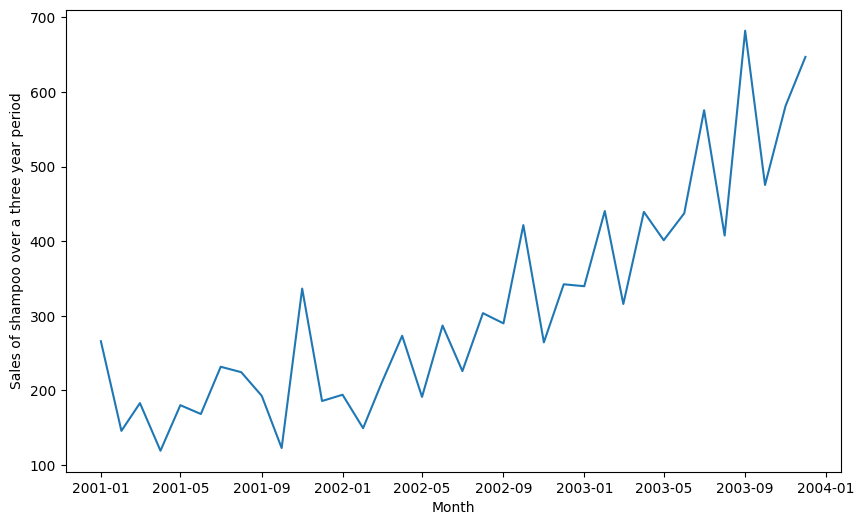

In [ ]:
plt.xlabel("Month")
plt.ylabel("Sales of shampoo over a three year period")
plt.plot(indexedDataset)

# **Step - 3 : Check the stationarity of raw data**

a. Using Rolling Statistics

In [ ]:
rollmean = indexedDataset.rolling(window=12).mean()
# rolling std at yearly level
rollstd = indexedDataset.rolling(window=12).std()
print(rollmean, rollstd)

            Sales of shampoo over a three year period
Month                                                
2001-01-01                                        NaN
2001-02-01                                        NaN
2001-03-01                                        NaN
2001-04-01                                        NaN
2001-05-01                                        NaN
2001-06-01                                        NaN
2001-07-01                                        NaN
2001-08-01                                        NaN
2001-09-01                                        NaN
2001-10-01                                        NaN
2001-11-01                                        NaN
2001-12-01                                 196.458333
2002-01-01                                 190.483333
2002-02-01                                 190.783333
2002-03-01                                 193.033333
2002-04-01                                 205.866667
2002-05-01                  

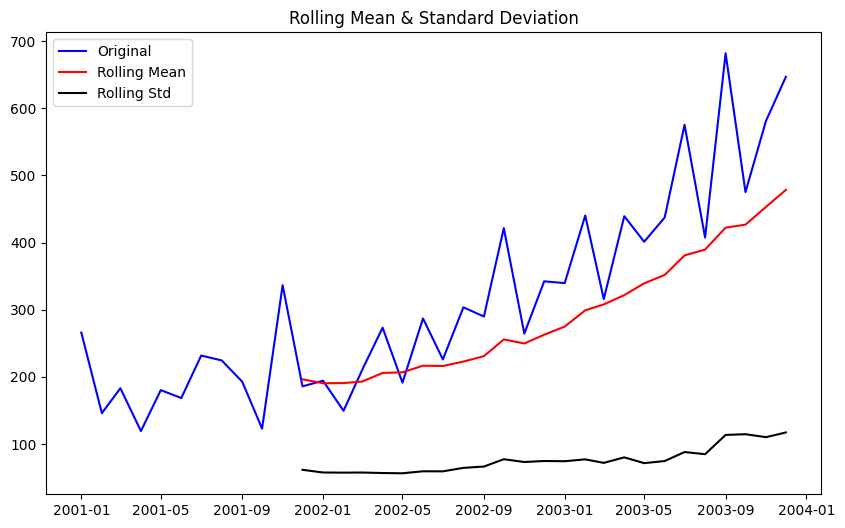

In [ ]:
orig = plt.plot(indexedDataset, color = 'blue', label = "Original")
mean = plt.plot(rollmean, color = 'red', label = "Rolling Mean")
std = plt.plot(rollstd, color = 'black', label = "Rolling Std")
plt.legend(loc = "best")
plt.title("Rolling Mean & Standard Deviation")
plt.show()

 Using Augmented Dicky-Fuller (ADF) Test

In [ ]:
# Perform Dicky-Fuller Test
#import statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller
print("Results of Dickey Fuller Test")
# Here AIC helps to analyse the exact value from actual values and difference between them
dftest = adfuller(indexedDataset['Sales of shampoo over a three year period'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value','#Lags used','No. of observations used'])
for key, value in dftest[4].items():
  dfoutput['Critical value (%s)'%key]= value

print(dfoutput)

Results of Dickey Fuller Test
Test statistic               3.060142
p-value                      1.000000
#Lags used                  10.000000
No. of observations used    25.000000
Critical value (1%)         -3.723863
Critical value (5%)         -2.986489
Critical value (10%)        -2.632800
dtype: float64


## **c.test_stationarity()**

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeSeries):
  # Determinig Rolling statistics
  movingaverage = timeSeries.rolling(window=12).mean()
  movingSTD = timeSeries.rolling(window=12).std()

  # Plot rolling statistics
  orig = plt.plot(timeSeries, color = 'blue', label = "Original")
  mean = plt.plot(movingaverage, color = 'red', label = "Rolling Mean")
  std = plt.plot(movingSTD, color = 'black', label = "Rolling Std")
  plt.legend(loc = "best")
  plt.title("Rolling Mean & Standard Deviation")
  plt.show()

  # Perform Dickey-Fuller Test
  print("Results of Dickey Fuller Test")
  dftest = adfuller(timeSeries['Sales of shampoo over a three year period'], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value','#Lags used','No. of observations used'])
  for key, value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]= value
  print(dfoutput)

# **Step - 4 : Perform transformation to incorporate stationarity**

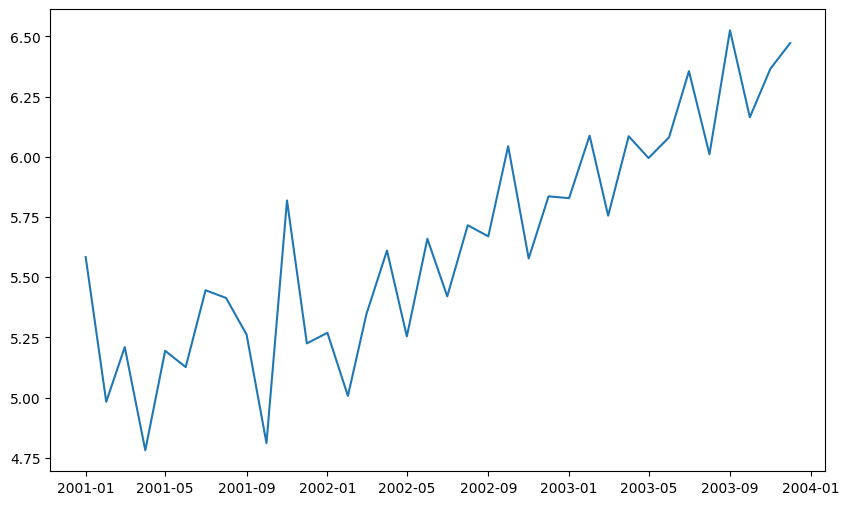

In [ ]:

# Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

Transformation - 1 : Subtracting Moving Average from LogScale Data
1(a) : Computation

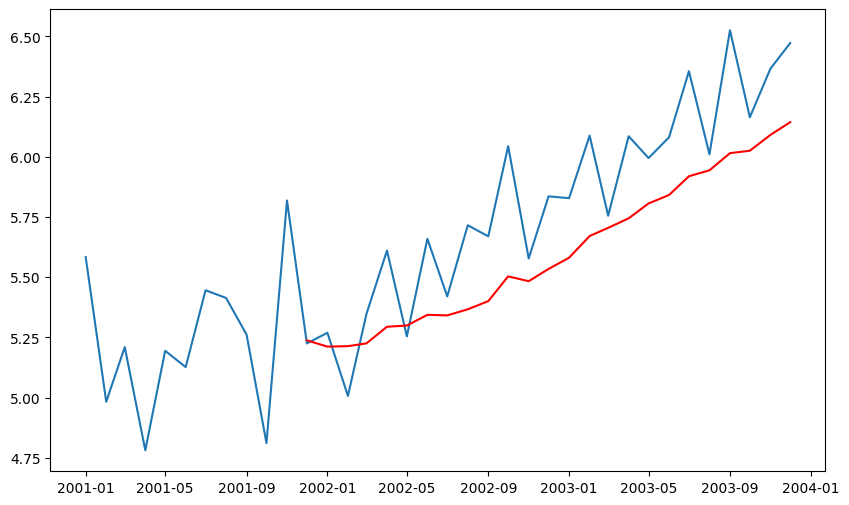

In [ ]:
movingaverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingaverage, color='red')
#plt.plot(movingSTD, color='black')

In [ ]:
dataLogScaleMinusMovingAverage = indexedDataset_logScale - movingaverage
dataLogScaleMinusMovingAverage.head(12)


,Sales of shampoo over a three year period
Month,
2001-01-01,NaN
2001-02-01,NaN
2001-03-01,NaN
2001-04-01,NaN
2001-05-01,NaN
2001-06-01,NaN
2001-07-01,NaN
2001-08-01,NaN
2001-09-01,NaN


In [ ]:

#Remove NaN values
dataLogScaleMinusMovingAverage.dropna(inplace=True)
dataLogScaleMinusMovingAverage.head(18)

,Sales of shampoo over a three year period
Month,
2001-12-01,-0.012810
2002-01-01,0.057558
2002-02-01,-0.206580
2002-03-01,0.122245
2002-04-01,0.316154
2002-05-01,-0.045029
2002-06-01,0.315709
2002-07-01,0.078873
2002-08-01,0.348896


1(b) : Plotting

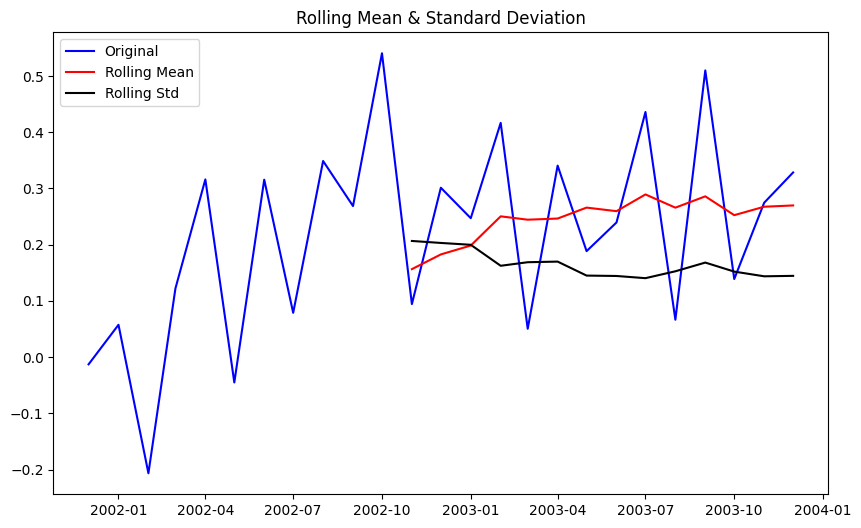

Results of Dickey Fuller Test
Test statistic              -2.866638
p-value                      0.049367
#Lags used                   8.000000
No. of observations used    16.000000
Critical value (1%)         -3.924019
Critical value (5%)         -3.068498
Critical value (10%)        -2.673893
dtype: float64


In [ ]:
test_stationarity(dataLogScaleMinusMovingAverage)

Transformation - 2 : Subtrating Exponential Decay Weighted Average from LogScale Data

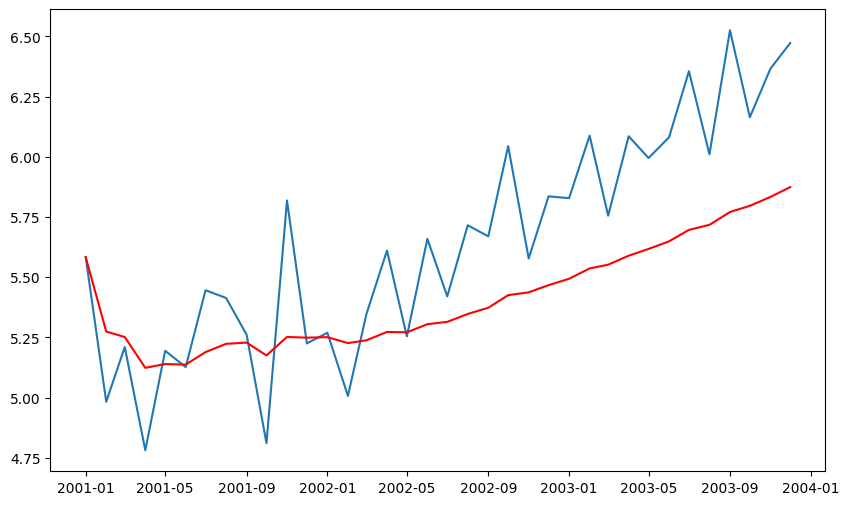

In [ ]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')


In [ ]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage

2(c) : Plotting

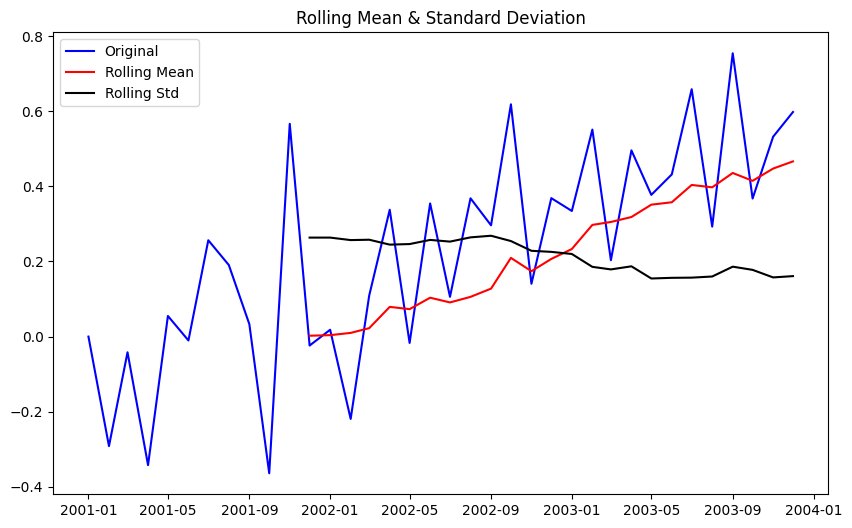

Results of Dickey Fuller Test
Test statistic              -0.945353
p-value                      0.772671
#Lags used                  10.000000
No. of observations used    25.000000
Critical value (1%)         -3.723863
Critical value (5%)         -2.986489
Critical value (10%)        -2.632800
dtype: float64


In [ ]:

test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

# **Step - 5 : Understanding the Components of Time Series**

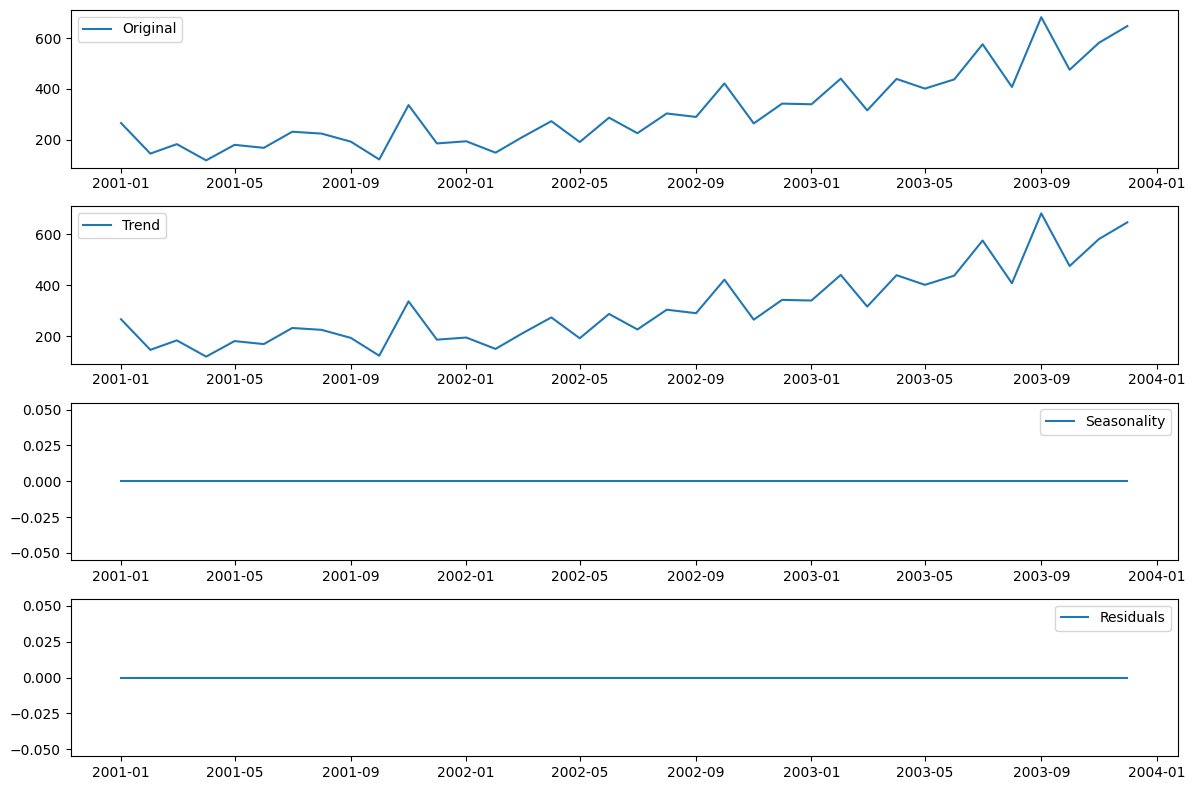

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Perform seasonal decomposition
decomposition = seasonal_decompose(indexedDataset['Sales of shampoo over a three year period'], model='additive', period=1)  # Period is set to 1 for monthly data

# Get the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(indexedDataset['Sales of shampoo over a three year period'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# **Step - 6 : Check whether the noise is stationary or not**

In [ ]:
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
print(decomposedLogData)

Month
2001-01-01    0.0
2001-02-01    0.0
2001-03-01    0.0
2001-04-01    0.0
2001-05-01    0.0
2001-06-01    0.0
2001-07-01    0.0
2001-08-01    0.0
2001-09-01    0.0
2001-10-01    0.0
2001-11-01    0.0
2001-12-01    0.0
2002-01-01    0.0
2002-02-01    0.0
2002-03-01    0.0
2002-04-01    0.0
2002-05-01    0.0
2002-06-01    0.0
2002-07-01    0.0
2002-08-01    0.0
2002-09-01    0.0
2002-10-01    0.0
2002-11-01    0.0
2002-12-01    0.0
2003-01-01    0.0
2003-02-01    0.0
2003-03-01    0.0
2003-04-01    0.0
2003-05-01    0.0
2003-06-01    0.0
2003-07-01    0.0
2003-08-01    0.0
2003-09-01    0.0
2003-10-01    0.0
2003-11-01    0.0
2003-12-01    0.0
Name: resid, dtype: float64


In [ ]:
decomposedLogData.describe()

count    36.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: resid, dtype: float64

In [ ]:

decomposedLogData.head(12)

Month
2001-01-01    0.0
2001-02-01    0.0
2001-03-01    0.0
2001-04-01    0.0
2001-05-01    0.0
2001-06-01    0.0
2001-07-01    0.0
2001-08-01    0.0
2001-09-01    0.0
2001-10-01    0.0
2001-11-01    0.0
2001-12-01    0.0
Name: resid, dtype: float64

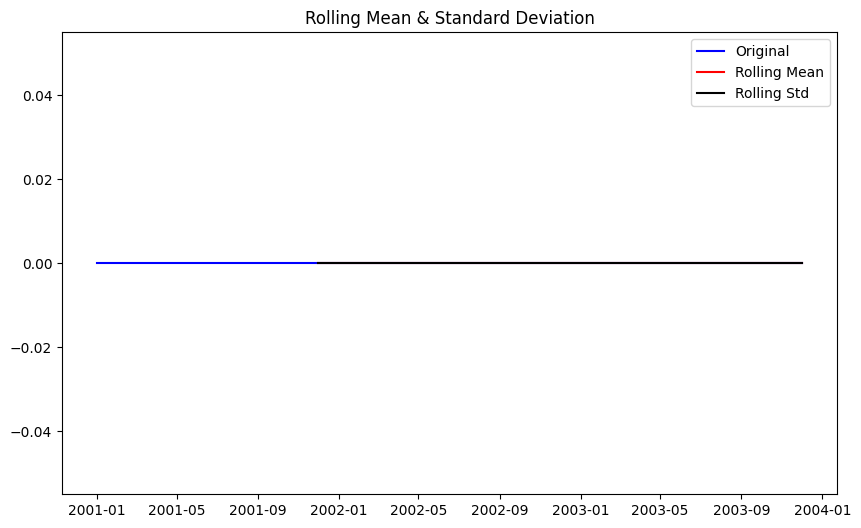

Results of Dickey Fuller Test


KeyError: 'Sales of shampoo over a three year period'

In [ ]:
test_stationarity(decomposedLogData)

# **Step - 7 : Implement the AR Model**
7(a) : Plot the ACF and PACF graphs
for LogScale Data from whihc Exponential Decay Weighted Average is subtracted

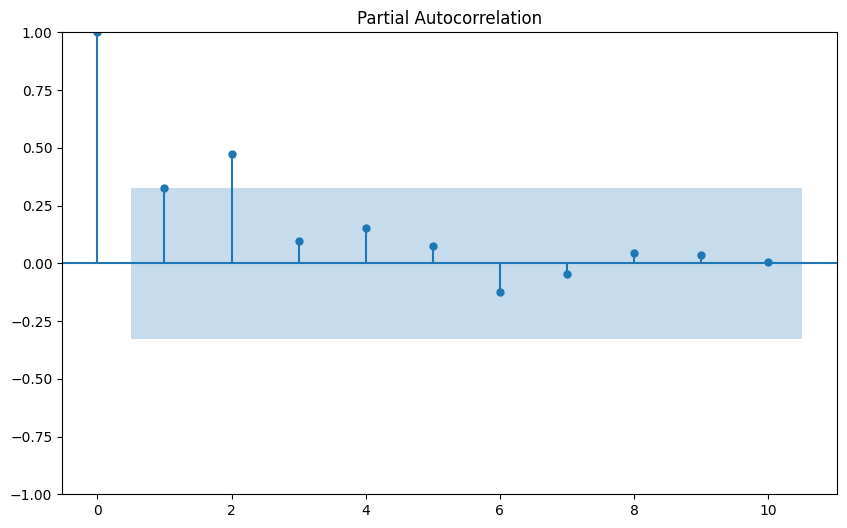

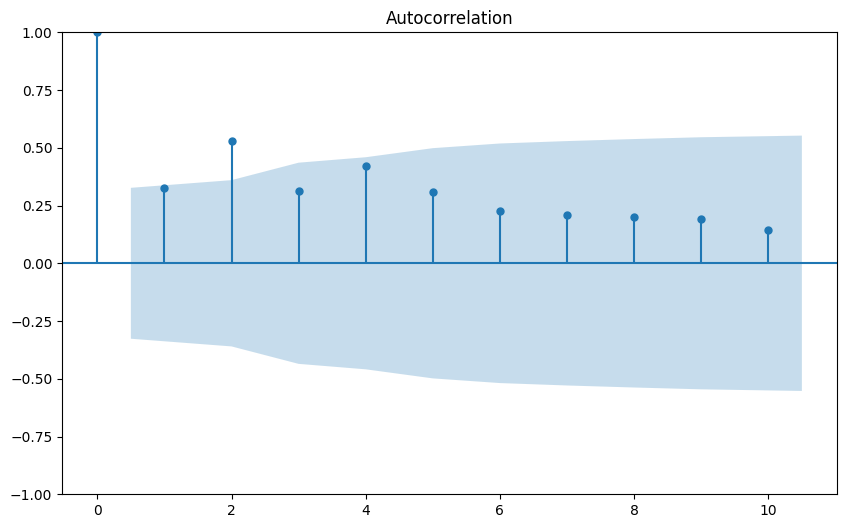

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf=plot_pacf(datasetLogScaleMinusMovingExponentialDecayAverage,lags=10)
acf=plot_acf(datasetLogScaleMinusMovingExponentialDecayAverage,lags=10)

7(b) : Split the LogScale Data for Training & Testing
Training with 7 years data
Testing with 5 years data

In [ ]:
train=datasetLogScaleMinusMovingExponentialDecayAverage[:len(datasetLogScaleMinusMovingExponentialDecayAverage)-60]
test=datasetLogScaleMinusMovingExponentialDecayAverage[len(datasetLogScaleMinusMovingExponentialDecayAverage)-60:]

7(c) : Train the AR Model

In [ ]:

from statsmodels.tsa.ar_model import AutoReg
# AR Model with p = 2 from PACF plot
model_1 = AutoReg(train, lags=1).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
print(model_1.summary())

                                        AutoReg Model Results                                        
Dep. Variable:     Sales of shampoo over a three year period   No. Observations:                   12
Model:                                            AutoReg(1)   Log Likelihood                  -0.653
Method:                                      Conditional MLE   S.D. of innovations              0.257
Date:                                       Wed, 27 Mar 2024   AIC                              7.306
Time:                                               15:21:49   BIC                              8.500
Sample:                                           02-01-2001   HQIC                             6.554
                                                - 12-01-2001                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

7(d) : Test the AR Model

In [ ]:
pred=model_1.predict(start=len(train),end=len(datasetLogScaleMinusMovingExponentialDecayAverage)-1, dynamic=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [ ]:
print(len(train))

12


In [ ]:
print(pred)

2002-01-01    0.008956
2002-02-01    0.001552
2002-03-01    0.003223
2002-04-01    0.002846
2002-05-01    0.002931
2002-06-01    0.002912
2002-07-01    0.002916
2002-08-01    0.002915
2002-09-01    0.002915
2002-10-01    0.002915
2002-11-01    0.002915
2002-12-01    0.002915
2003-01-01    0.002915
2003-02-01    0.002915
2003-03-01    0.002915
2003-04-01    0.002915
2003-05-01    0.002915
2003-06-01    0.002915
2003-07-01    0.002915
2003-08-01    0.002915
2003-09-01    0.002915
2003-10-01    0.002915
2003-11-01    0.002915
2003-12-01    0.002915
Freq: MS, dtype: float64


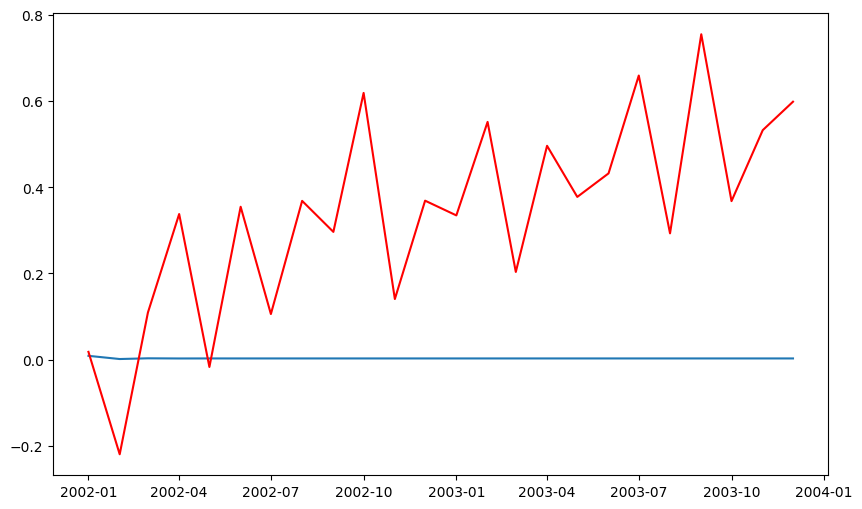

In [ ]:
plt.plot(pred)
plt.plot(test, color='red')

7(e) : Calculate the Error

In [ ]:

from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(test,pred))
print(rmse)


0.404244169880066


In [ ]:

pred_future=model_1.predict(start=len(datasetLogScaleMinusMovingExponentialDecayAverage)+1, end=len(datasetLogScaleMinusMovingExponentialDecayAverage)+60, dynamic=False)
print("Prediction for next 5 years")
print(pred_future)
print("No. of predictions : \t", len(pred_future))

Prediction for next 5 years
2004-02-01    0.002915
2004-03-01    0.002915
2004-04-01    0.002915
2004-05-01    0.002915
2004-06-01    0.002915
2004-07-01    0.002915
2004-08-01    0.002915
2004-09-01    0.002915
2004-10-01    0.002915
2004-11-01    0.002915
2004-12-01    0.002915
2005-01-01    0.002915
2005-02-01    0.002915
2005-03-01    0.002915
2005-04-01    0.002915
2005-05-01    0.002915
2005-06-01    0.002915
2005-07-01    0.002915
2005-08-01    0.002915
2005-09-01    0.002915
2005-10-01    0.002915
2005-11-01    0.002915
2005-12-01    0.002915
2006-01-01    0.002915
2006-02-01    0.002915
2006-03-01    0.002915
2006-04-01    0.002915
2006-05-01    0.002915
2006-06-01    0.002915
2006-07-01    0.002915
2006-08-01    0.002915
2006-09-01    0.002915
2006-10-01    0.002915
2006-11-01    0.002915
2006-12-01    0.002915
2007-01-01    0.002915
2007-02-01    0.002915
2007-03-01    0.002915
2007-04-01    0.002915
2007-05-01    0.002915
2007-06-01    0.002915
2007-07-01    0.002915
2007-0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


Step - 8 : Implement ARIMA Model

8(a) : Deriving the parameters of ARIMA Models
Note :

ARIMA model consists of 3 models
AR (Autoregression) model
Integration
MA (Movung Average) model
ARIMA Model has 3 parameters
p : autoregressive lags
d : order of differnetiation (# times a time series is differentiated)
q : moving average
8(a) - 1 : Compute d value
Differentiate the LogScale Data by 1 ie. d = 1

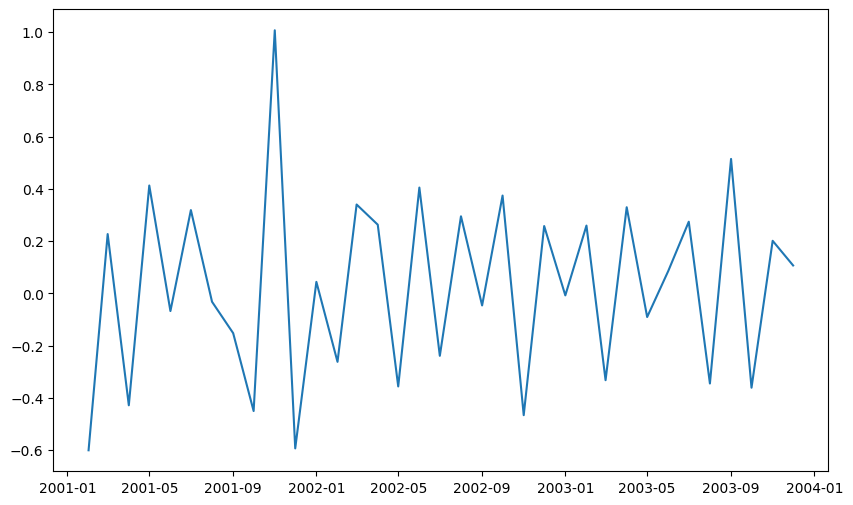

In [ ]:

datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

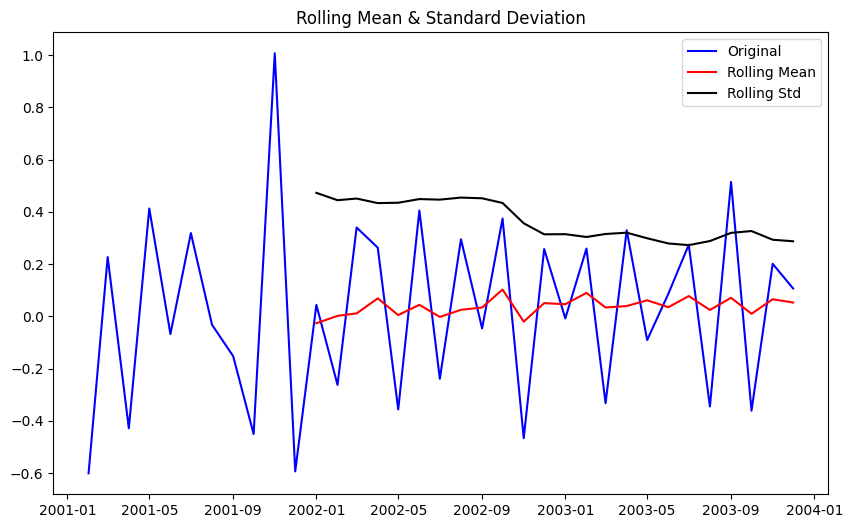

Results of Dickey Fuller Test
Test statistic              -2.168202
p-value                      0.217988
#Lags used                  10.000000
No. of observations used    24.000000
Critical value (1%)         -3.737709
Critical value (5%)         -2.992216
Critical value (10%)        -2.635747
dtype: float64


In [ ]:

datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

8(a)-2 : Compute p & q values
Autocorrelation Function (ACF) Graph : To find q value
Partial Autocorrelation Function (PACF) Graph : To compute p value

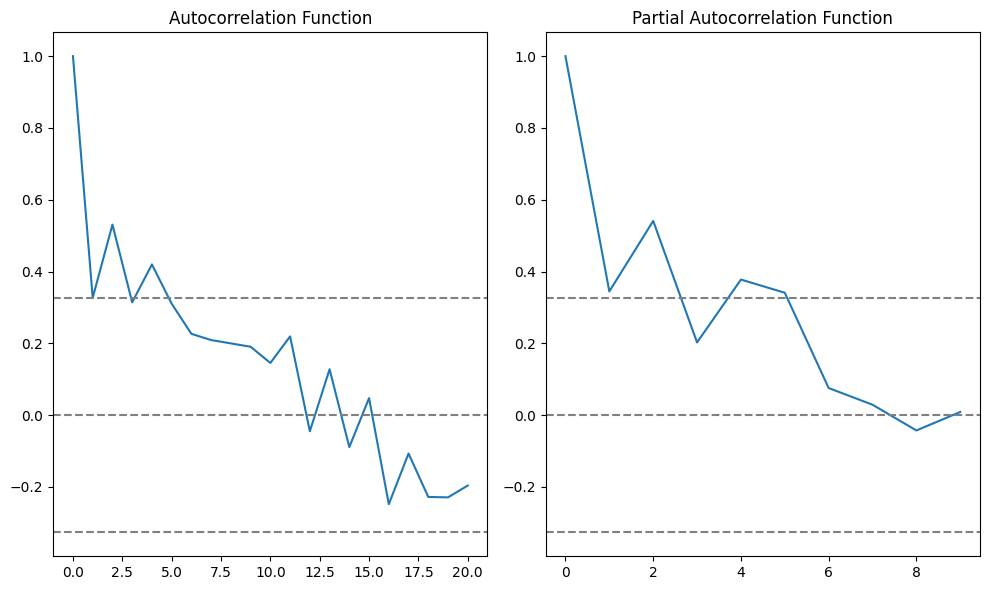

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already defined datasetLogScaleMinusMovingExponentialDecayAverage

# Calculate ACF and PACF
lag_acf = acf(datasetLogScaleMinusMovingExponentialDecayAverage, nlags=20)
lag_pacf = pacf(datasetLogScaleMinusMovingExponentialDecayAverage, nlags=9, method='ols')

# Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.title("Autocorrelation Function")

# Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

plt.show()

8(b) : Compute the Models
8(b) - 1 : AR Model using ARIMA package

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Month
2001-01-01    0.224555
2001-02-01    0.132551
2001-03-01    0.005813
2001-04-01   -0.110582
2001-05-01   -0.026594
2001-06-01   -0.121074
2001-07-01    0.087562
2001-08-01    0.099963
2001-09-01    0.236103
2001-10-01    0.170722
2001-11-01    0.010936
2001-12-01   -0.039905
2002-01-01    0.369166
2002-02-01    0.049013
2002-03-01    0.029091
2002-04-01   -0.042869
2002-05-01    0.181179
2002-06-01    0.243365
2002-07-01    0.114179
2002-08-01    0.275095
2002-09-01    0.184809
2002-10-01    0.317365
2002-11-01    0.336153
2002-12-01    0.427981
2003-01-01    0.204205
2003-02-01    0.324598
2003-03-01    0.345129
2003-04-01    0.402087
2003-05-01    0.262241
2003-06-01    0.403027
2003-07-01    0.347185
2003-08-01    0.418797
2003-09-01    0.478072
2003-10-01    0.359019
2003-11-01    0.544801
2003-12-01    0.360025
dtype: float64
RSS: 1.886956
Plotting AR Model


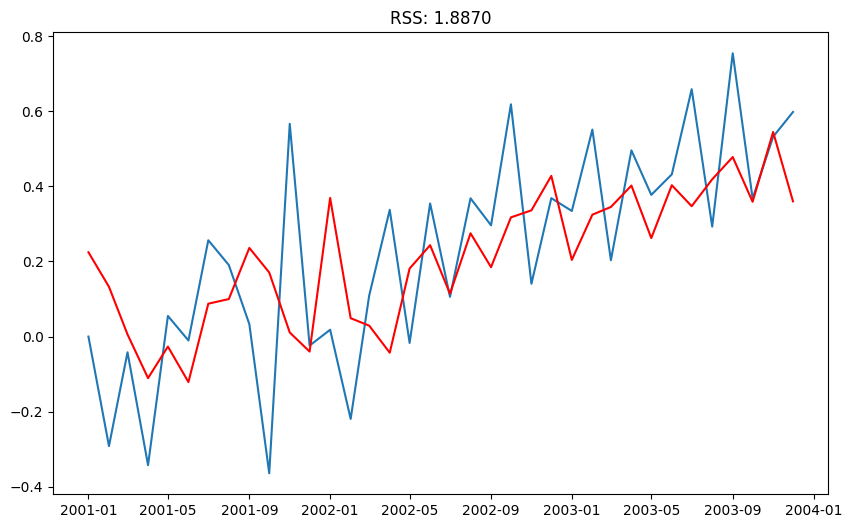

In [ ]:

from statsmodels.tsa.arima.model import ARIMA
# AR Model
model_0 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,0,0))
results_AR = model_0.fit()
print(results_AR.fittedvalues)
print('RSS: %f' % sum((results_AR.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Sales of shampoo over a three year period'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Sales of shampoo over a three year period'])**2))
print("Plotting AR Model")

8(b) - 3 : ARMA Model using ARIMA package

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Month
2001-01-01    0.214963
2001-02-01    0.101509
2001-03-01   -0.020126
2001-04-01   -0.139568
2001-05-01   -0.063981
2001-06-01   -0.188103
2001-07-01   -0.035354
2001-08-01   -0.042672
2001-09-01    0.102558
2001-10-01    0.113402
2001-11-01    0.075416
2001-12-01   -0.095109
2002-01-01    0.242508
2002-02-01    0.050545
2002-03-01    0.082291
2002-04-01   -0.049012
2002-05-01    0.063669
2002-06-01    0.163644
2002-07-01    0.068200
2002-08-01    0.219611
2002-09-01    0.139036
2002-10-01    0.260677
2002-11-01    0.251679
2002-12-01    0.409584
2003-01-01    0.250055
2003-02-01    0.335275
2003-03-01    0.313605
2003-04-01    0.415640
2003-05-01    0.293804
2003-06-01    0.405068
2003-07-01    0.360997
2003-08-01    0.398079
2003-09-01    0.493734
2003-10-01    0.376746
2003-11-01    0.558336
2003-12-01    0.421208
dtype: float64
RSS: 1.692777
Plotting ARIMA Model


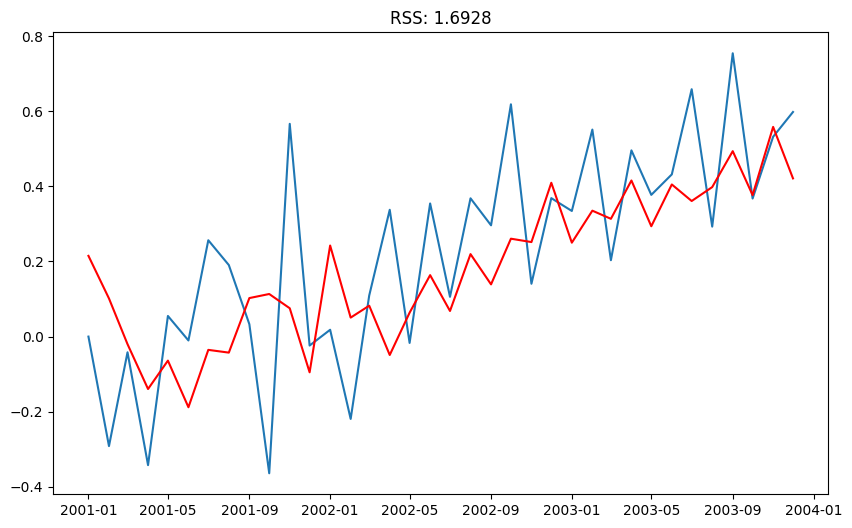

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# ARMA Model
model_03 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,0,2))
results_ARMA = model_03.fit()
print(results_ARMA.fittedvalues)
print('RSS: %f' % sum((results_ARMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Sales of shampoo over a three year period'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_ARMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Sales of shampoo over a three year period'])**2))
print("Plotting ARIMA Model")

8(c) : Install the pmdarima package

In [ ]:

!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.6 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
#ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:

stepwise_fit=auto_arima(indexedDataset_logScale, trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9.187, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=31.566, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11.414, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8.154, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=29.741, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6.022, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7.917, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7.236, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6.056, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=12.021, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=11.140, Time=0.07 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.213 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(1, 1, 1)   Log Likelihood                   0.989
Date:                Wed, 27 Mar 2024   AIC                              6.022
Time:                        15:27:26   BIC                             12.244
Sample:                    01-01-2001   HQIC                             8.170
                         - 12-01-2003                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0529      0.016      3.390      0.001       0.022       0.084
ar.L1         -0.4195      0.269     -1.560      0.119      -0.947       0.108
ma.L1         -0.7548      0.198     -3.810      0.000      -1.143      -0.366
sigma2         0.0529      0.013      4.151      0.000       0.028       0.078
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):                 2.79
Prob(Q):                              0.44   Prob(JB):                         0.25
Heteroskedasticity (H):               0.21   Skew:                            -0.68
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Month
2001-01-01    0.000000
2001-02-01    0.000000
2001-03-01   -0.084955
2001-04-01   -0.184794
2001-05-01   -0.084207
2001-06-01   -0.230346
2001-07-01   -0.138110
2001-08-01   -0.157314
2001-09-01    0.010223
2001-10-01    0.254057
2001-11-01    0.364570
2001-12-01    0.024718
2002-01-01    0.067419
2002-02-01   -0.177852
2002-03-01    0.016502
2002-04-01    0.141551
2002-05-01    0.029823
2002-06-01    0.131773
2002-07-01   -0.119283
2002-08-01    0.290345
2002-09-01    0.231007
2002-10-01    0.422965
2002-11-01    0.231004
2002-12-01    0.451790
2003-01-01    0.313671
2003-02-01    0.436704
2003-03-01    0.300233
2003-04-01    0.385308
2003-05-01    0.280362
2003-06-01    0.439749
2003-07-01    0.453380
2003-08-01    0.376880
2003-09-01    0.572739
2003-10-01    0.369994
2003-11-01    0.659397
2003-12-01    0.523666
dtype: float64
RSS: 1.247611
Plotting ARIMA Model


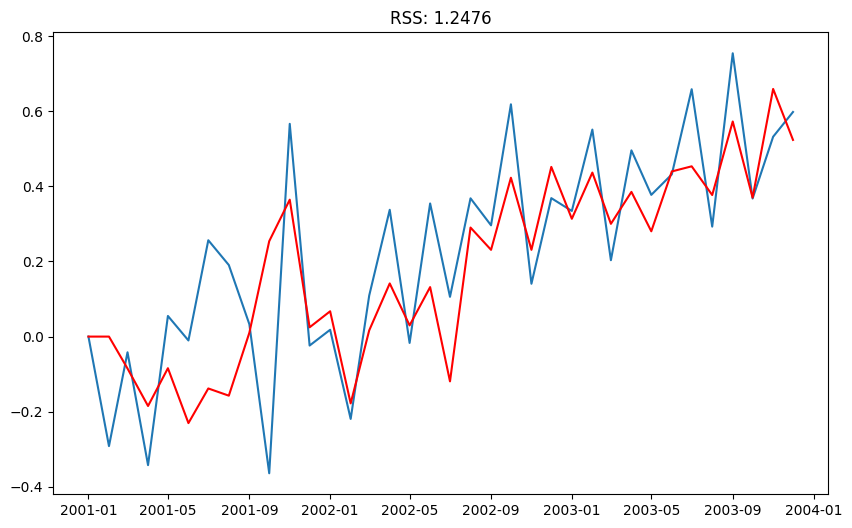

In [ ]:

from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model
model_2 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(4,1,3))
results_ARIMA = model_2.fit()
print(results_ARIMA.fittedvalues)
print('RSS: %f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Sales of shampoo over a three year period'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Sales of shampoo over a three year period'])**2))
print("Plotting ARIMA Model")

8(d) : Prepare the fitted values for predictions

Month
2001-02-01    0.000000
2001-03-01   -0.600575
2001-04-01   -0.450240
2001-05-01    0.006477
2001-06-01   -0.470203
2001-07-01   -0.173945
2001-08-01   -0.598962
2001-09-01   -0.396138
2001-10-01    0.067534
2001-11-01    0.952160
2001-12-01   -0.365032
2002-01-01    0.328856
2002-02-01   -0.272643
2002-03-01    0.201200
2002-04-01   -0.010388
2002-05-01   -0.198263
2002-06-01    0.181345
2002-07-01   -0.496756
2002-08-01    0.119365
2002-09-01   -0.109356
2002-10-01    0.148040
2002-11-01   -0.378672
2002-12-01    0.341073
2003-01-01   -0.017568
2003-02-01    0.175023
2003-03-01   -0.203019
2003-04-01    0.243284
2003-05-01   -0.241092
2003-06-01    0.101117
2003-07-01    0.064790
2003-08-01   -0.246044
2003-09-01    0.321163
2003-10-01   -0.395733
2003-11-01    0.335864
2003-12-01    0.057720
dtype: float64
RSS: 2.905436
Plotting ARIMA Model


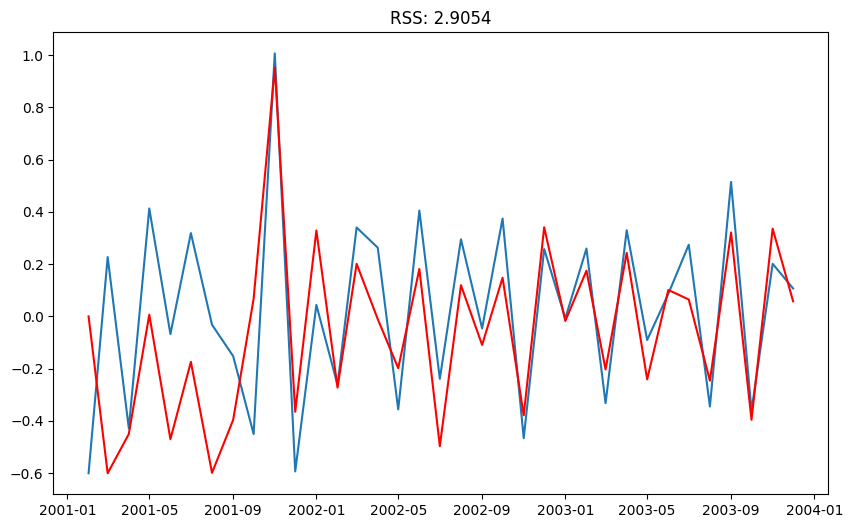

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model with
model_3 = ARIMA(datasetLogDiffShifting, order=(4,1,3))
results_ARIMA = model_3.fit()
print(results_ARIMA.fittedvalues)
print('RSS: %f' % sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Sales of shampoo over a three year period'])**2))
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Sales of shampoo over a three year period'])**2))
print("Plotting ARIMA Model")

8(d) - 1 : Convert the fitted values into a Series Format

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

Month
2001-02-01    0.000000
2001-03-01   -0.600575
2001-04-01   -0.450240
2001-05-01    0.006477
2001-06-01   -0.470203
dtype: float64



8(d)- 2 : Find the Cummulative Sum and find the predictions for the fitted values



In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
2001-02-01    0.000000
2001-03-01   -0.600575
2001-04-01   -1.050814
2001-05-01   -1.044337
2001-06-01   -1.514541
dtype: float64


In [ ]:
predictiona_ARIMA_log = pd.Series(indexedDataset_logScale['Sales of shampoo over a three year period'].iloc[0],index = indexedDataset_logScale.index)
predictiona_ARIMA_log = predictiona_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictiona_ARIMA_log.head()

Month
2001-01-01    5.583496
2001-02-01    5.583496
2001-03-01    4.982922
2001-04-01    4.532682
2001-05-01    4.539159
dtype: float64

8(d)-3 : Perform Exponential of the data to bring it to original form

In [ ]:

predictions_ARIMA = np.exp(predictiona_ARIMA_log)


8(d)-4: Plot the predictions made by ARIMA Model over the original Data

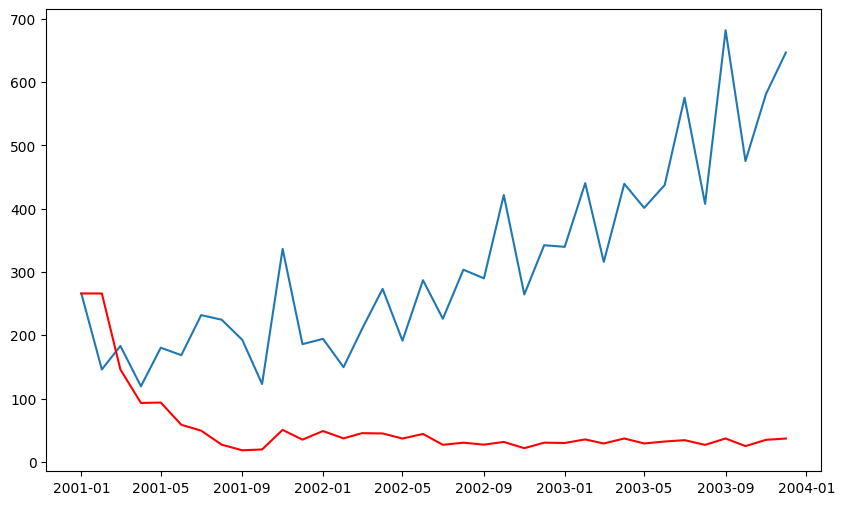

In [ ]:
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA, color='red')

8(e) : Predictions for 2 years

In [ ]:
indexedDataset_logScale

,Sales of shampoo over a three year period
Month,
2001-01-01,5.583496
2001-02-01,4.982921
2001-03-01,5.210032
2001-04-01,4.781641
2001-05-01,5.194622
2001-06-01,5.126936
2001-07-01,5.445875
2001-08-01,5.413876
2001-09-01,5.261653


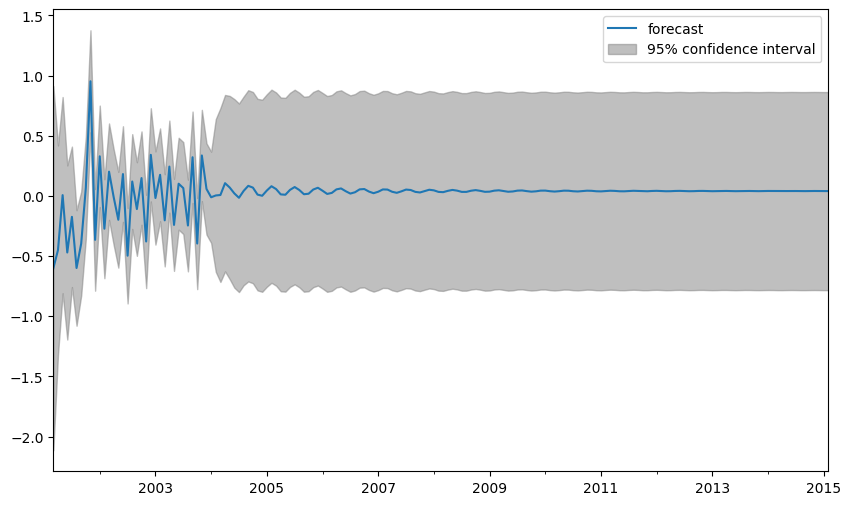

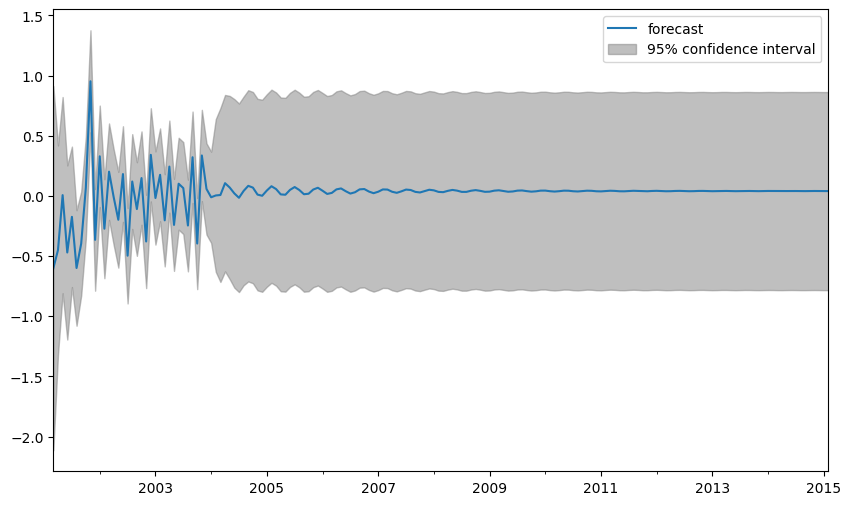

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
# We have 144 rows + 24 to be predictions
plot_predict(results_ARIMA,1,168)

In [ ]:
results_ARIMA.forecast(steps=24)

2004-01-01   -0.011450
2004-02-01    0.003517
2004-03-01    0.007320
2004-04-01    0.105646
2004-05-01    0.069575
2004-06-01    0.020795
2004-07-01   -0.015745
2004-08-01    0.041163
2004-09-01    0.083487
2004-10-01    0.068749
2004-11-01    0.010658
2004-12-01    0.001040
2005-01-01    0.044402
2005-02-01    0.080308
2005-03-01    0.056517
2005-04-01    0.012389
2005-05-01    0.009577
2005-06-01    0.049991
2005-07-01    0.073505
2005-08-01    0.049009
2005-09-01    0.013771
2005-10-01    0.017938
2005-11-01    0.052710
2005-12-01    0.067519
Freq: MS, Name: predicted_mean, dtype: float64

Approach - 2

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
print(datasetLogScaleMinusMovingExponentialDecayAverage.shape)
train=datasetLogScaleMinusMovingExponentialDecayAverage.iloc[:-60]
test=datasetLogScaleMinusMovingExponentialDecayAverage.iloc[-60:]
print(train.shape,test.shape)

(36, 1)
(0, 1) (36, 1)
